# About Dataset

## Context
This is a dataset to train and test Machine learning forecasting algorithms and compare results with the official forecast from weekly pre-dispatch reports. The following considerations are kept to compare forecasting results with the weekly pre-dispatch forecast:

- Saturday is the first day of each weekly forecast; for instance, Friday is the last day.
- A 72-hour gap of unseen records should be considered before the first day to forecast. In other words, next week forecast should be done with records until each Tuesday last hour.

Data sources provide hourly records. the data composition is the following:

- Historical electricity load, available on daily post-dispatch reports, from the grid operator(CND).
- Historical weekly forecasts available on weekly pre-dispatch reports, both from CND.
- Calendar information related to school periods, from Panama's Ministry of education.
- Calendar information related to holidays, from 'When on Earth?' website.
- Weather variables, such as temperature, relative humidity, precipitation, and wind speed, for three main cities in Panama, from Earthdata.

## Content

The original data sources provide the post-dispatch electricity load in individual Excel files on a daily basis and weekly pre-dispatch electricity load forecast data in individual Excel files on a weekly basis, both with hourly granularity. Holidays and school preiods data is sparse, along with websites and PDF files. Weather data is available on daily NetCDF files.

For simplicity, the published datasets are already pre-processed by merging all data sources in the date-time index:

- A CSV file containing all records ina single continuous dataset with all variables
- A CSV file containing the load forecast from weekly pre-dispatch reports
- Two Excel files containing suggested regressors and 14 training/testing dataset pairs as described in the PDF file.

### Variables

- nat_demand: national electricity load
- T2M: temperature at 2 metres above the Earth's surface
- QV2M: relative humidity at 2 metres above the Earth's surface
- TQL: liquid precipitation
- W2M: wind speed at 2 metres above the Earth's surface

after the underscore is the city

- toc: Tocumen city
- san: Santiago city
- dav: David city

others

- Holiday_ID: unique identification number for [holidays](https://www.whenonearth.com/calendar/panama/2020)
- holiday: binary indicator (1 - holiday, 0 - regular day)
- school: binary indicator (1 - school day, 0 - vacations)

## Acknowledgements

Aguilar Madrid, Ernesto (2021), “Short-term electricity load forecasting (Panama case study)”, Mendeley Data, V1, doi: 10.17632/byx7sztj59.1

*Source: [Kaggle](https://www.kaggle.com/datasets/saurabhshahane/electricity-load-forecasting)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
continuous_data = pd.read_csv('continuous_dataset.csv', parse_dates=[0])
continuous_data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [3]:
continuous_data.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


In [4]:
continuous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    48048 non-null  datetime64[ns]
 1   nat_demand  48048 non-null  float64       
 2   T2M_toc     48048 non-null  float64       
 3   QV2M_toc    48048 non-null  float64       
 4   TQL_toc     48048 non-null  float64       
 5   W2M_toc     48048 non-null  float64       
 6   T2M_san     48048 non-null  float64       
 7   QV2M_san    48048 non-null  float64       
 8   TQL_san     48048 non-null  float64       
 9   W2M_san     48048 non-null  float64       
 10  T2M_dav     48048 non-null  float64       
 11  QV2M_dav    48048 non-null  float64       
 12  TQL_dav     48048 non-null  float64       
 13  W2M_dav     48048 non-null  float64       
 14  Holiday_ID  48048 non-null  int64         
 15  holiday     48048 non-null  int64         
 16  school      48048 non-

In [5]:
weekly_data = pd.read_csv('weekly_pre-dispatch_forecast.csv')
weekly_data.head()

,datetime,load_forecast
0,1/2/2016 0:00,1056.9
1,1/2/2016 1:00,1057.1
2,1/2/2016 2:00,996.5
3,1/2/2016 3:00,955.8
4,1/2/2016 4:00,918.0


In [6]:
weekly_data.describe()

,load_forecast
count,40152.000000
mean,1207.929346
std,195.240605
min,0.000000
25%,1046.600000
50%,1197.750000
75%,1349.800000
max,1760.400000


In [7]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       40152 non-null  object 
 1   load_forecast  40152 non-null  float64
dtypes: float64(1), object(1)
memory usage: 627.5+ KB


In [8]:
train_data = pd.read_excel('train_dataframes.xlsx')
train_data.head()

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [9]:
train_data.describe()

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
count,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000,36720.000000
mean,1172.405388,1171.627655,1170.818351,1171.860987,3.996187,0.286247,0.063399,0.710458,11.500000,27.350902,1174.246264
std,191.916845,191.649220,191.535919,184.017825,1.999642,0.452013,0.243682,3.171065,6.922281,1.685151,192.028058
min,85.192500,85.192500,85.192500,793.602650,1.000000,0.000000,0.000000,0.000000,0.000000,22.953455,85.192500
25%,1004.807450,1004.093150,1003.349825,1005.241544,2.000000,0.000000,0.000000,0.000000,5.750000,26.111856,1006.470375
50%,1160.983850,1160.245150,1158.946650,1166.273912,4.000000,0.000000,0.000000,0.000000,11.500000,27.072916,1162.468800
75%,1318.602650,1317.705275,1316.997800,1310.217306,6.000000,1.000000,0.000000,0.000000,17.250000,28.514787,1320.387025
max,1719.043900,1645.477300,1645.477300,1608.401625,7.000000,1.000000,1.000000,22.000000,23.000000,35.039575,1719.043900


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    36720 non-null  datetime64[ns]
 1   week_X-2    36720 non-null  float64       
 2   week_X-3    36720 non-null  float64       
 3   week_X-4    36720 non-null  float64       
 4   MA_X-4      36720 non-null  float64       
 5   dayOfWeek   36720 non-null  int64         
 6   weekend     36720 non-null  int64         
 7   holiday     36720 non-null  int64         
 8   Holiday_ID  36720 non-null  int64         
 9   hourOfDay   36720 non-null  int64         
 10  T2M_toc     36720 non-null  float64       
 11  DEMAND      36720 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 3.4 MB


In [11]:
continuous_data.columns = continuous_data.columns.str.lower()
continuous_data.head()

,datetime,nat_demand,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [12]:
order = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,1]
continuous_data = continuous_data.iloc[:,order]
continuous_data

,datetime,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school,nat_demand
0,2015-01-03 01:00:00,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0,970.3450
1,2015-01-03 02:00:00,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0,912.1755
2,2015-01-03 03:00:00,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0,900.2688
3,2015-01-03 04:00:00,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0,889.9538
4,2015-01-03 05:00:00,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0,893.6865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1,1128.5592
48044,2020-06-26 21:00:00,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1,1112.7488
48045,2020-06-26 22:00:00,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1,1081.5680
48046,2020-06-26 23:00:00,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1,1041.6240


<AxesSubplot:>

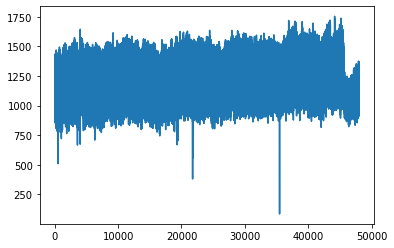

In [13]:
continuous_data['nat_demand'].plot()

### Distribution of demand

<AxesSubplot:xlabel='nat_demand', ylabel='Count'>

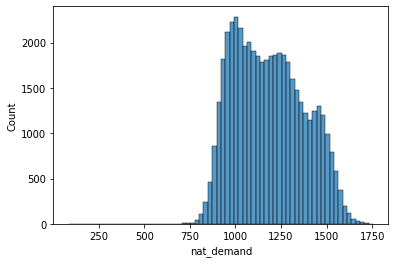

In [14]:
sns.histplot(continuous_data.nat_demand, bins = 70)

<AxesSubplot:xlabel='nat_demand', ylabel='Count'>

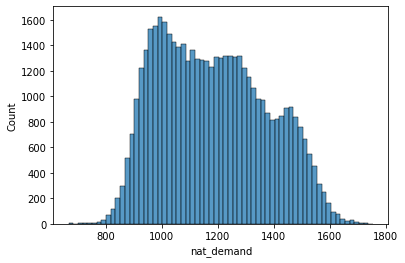

In [15]:
sns.histplot(continuous_data.nat_demand[continuous_data.nat_demand > 600])

<AxesSubplot:xlabel='nat_demand', ylabel='Count'>

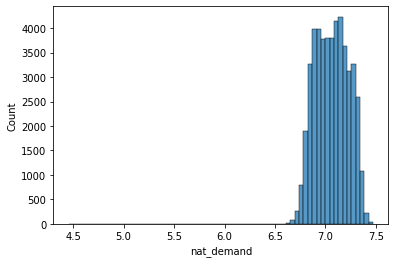

In [16]:
sns.histplot(np.log1p(continuous_data.nat_demand), bins = 70)

### Missing values

In [17]:
continuous_data.isnull().sum()

datetime      0
t2m_toc       0
qv2m_toc      0
tql_toc       0
w2m_toc       0
t2m_san       0
qv2m_san      0
tql_san       0
w2m_san       0
t2m_dav       0
qv2m_dav      0
tql_dav       0
w2m_dav       0
holiday_id    0
holiday       0
school        0
nat_demand    0
dtype: int64

### Validation framework

In [18]:
n = len(continuous_data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(9609, 9609, 28830)

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(10)
np.random.shuffle(idx)

In [21]:
continuous_data.iloc[idx[:10]]

,datetime,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school,nat_demand
39263,2019-06-27 00:00:00,26.980127,0.020089,0.030746,12.794612,25.933252,0.019616,0.090515,3.914907,23.698877,0.018280,0.146362,2.554581,0,0,1,1161.639800
38908,2019-06-12 05:00:00,26.385461,0.018647,0.110962,5.437594,24.510461,0.017075,0.023666,1.745723,22.479211,0.016404,0.040192,0.308484,0,0,1,1035.600500
2196,2015-04-04 13:00:00,31.402612,0.015428,0.034317,30.198566,36.027612,0.013296,0.018463,16.414088,31.949487,0.013708,0.063110,3.443189,10,1,1,1046.911200
674,2015-01-31 03:00:00,25.006738,0.016846,0.021332,19.271972,22.295801,0.015732,0.022301,6.898436,21.366113,0.014778,0.090454,4.808765,0,0,0,903.363700
43569,2019-12-23 10:00:00,28.027368,0.020108,0.088470,15.839206,28.511743,0.020192,0.104980,7.182684,25.089868,0.018727,0.138855,2.175239,0,0,0,1452.419300
25640,2017-12-06 09:00:00,28.481409,0.020384,0.082214,17.125835,27.567346,0.020102,0.202637,8.437544,24.965784,0.018538,0.147339,3.883965,0,0,1,1342.574200
44402,2020-01-27 03:00:00,24.305505,0.016860,0.033096,9.576158,22.438318,0.015892,0.095703,4.386899,22.149255,0.016822,0.269775,2.328709,0,0,0,959.277800
21226,2017-06-05 11:00:00,28.857904,0.019456,0.068695,0.639822,29.873529,0.018587,0.070312,3.692642,27.342279,0.018053,0.082458,1.245646,0,0,0,1562.151538
31886,2018-08-23 15:00:00,28.341852,0.019013,0.118896,12.373839,27.919977,0.018273,0.181885,1.770417,26.404352,0.017006,0.280762,4.051809,0,0,1,1352.297800
7320,2015-11-04 01:00:00,26.399011,0.017772,0.142090,1.105608,24.016199,0.017963,0.145325,3.573559,22.750574,0.017704,0.276123,3.835458,15,1,1,874.807000


In [22]:
train = continuous_data.iloc[idx[:n_train]]
val = continuous_data.iloc[idx[n_train:n_train+n_val]]
test = continuous_data.iloc[idx[n_train+n_val:]]

In [23]:
train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)

In [24]:
y_train = train.nat_demand
y_val = val.nat_demand
y_test = test.nat_demand

In [25]:
del train['nat_demand']
del val['nat_demand']
del test['nat_demand']
del train['datetime']
del val['datetime']
del test['datetime']

In [26]:
def prepare(df):
    X = df.values
    return X

def lin_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    #add regularisation
    reg = r * np.eye(XTX.shape[0])
    XTX += reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [27]:
X_train = prepare(train)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    b, w = lin_reg(X_train, y_train, r=r)
    y_pred = b + X_train.dot(w)
    error = rmse(y_train, y_pred)
    print('%5s, %.5f' % (r, error))

    0, 136.39273
1e-06, 136.39273
0.0001, 136.39288
0.001, 136.40481
 0.01, 136.65647
  0.1, 137.31089
    1, 137.88148
    5, 138.01555
   10, 138.08839


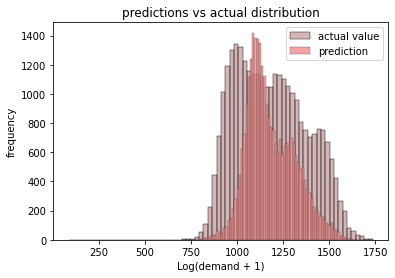

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='actual value', color='#ab6f6f', alpha=0.5, bins=70)
sns.histplot(y_pred, label='prediction', color='#f08f8f', alpha=0.8, bins=70)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('Log(demand + 1)')
plt.title('predictions vs actual distribution')

plt.show()

### Applying Linear Regression

In [29]:
# !py -m pip install scipy --upgrade

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [31]:
df_new = continuous_data.drop('datetime', axis=1)
df_new

,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school,nat_demand
0,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0,970.3450
1,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0,912.1755
2,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0,900.2688
3,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0,889.9538
4,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0,893.6865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1,1128.5592
48044,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1,1112.7488
48045,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1,1081.5680
48046,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1,1041.6240


In [32]:
X = df_new.drop('nat_demand', axis = 1)
y = df_new['nat_demand']

In [33]:
np.random.seed(22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(drop=True)
X_test.reset_index(drop=True)

,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school
0,26.838281,0.019571,0.011230,12.542945,25.447656,0.019792,0.146912,4.361644,23.463281,0.018472,0.201843,3.623005,0,0,1
1,30.440271,0.015833,0.026192,12.585600,34.752771,0.013140,0.041687,7.947680,30.799646,0.012583,0.052017,1.485591,0,0,1
2,26.289850,0.019936,0.101288,13.777899,25.477350,0.019532,0.115906,4.171107,23.821100,0.018281,0.166321,2.448981,0,0,1
3,27.835046,0.020852,0.046829,6.990440,26.131921,0.020036,0.029800,3.421541,24.585046,0.019029,0.050552,2.190328,0,0,1
4,28.492242,0.016411,0.097137,28.149030,30.335992,0.015663,0.048340,17.908751,26.585992,0.015800,0.112671,5.815727,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,25.443353,0.015616,0.022331,26.738676,24.435541,0.015029,0.001950,13.702685,22.255853,0.014720,0.041122,7.035558,0,0,1
9606,26.838617,0.019321,0.018356,8.855463,24.463617,0.018642,0.058578,3.738912,23.229242,0.017765,0.238647,1.888123,0,0,1
9607,27.240564,0.018992,0.045990,6.690764,25.037439,0.018900,0.301514,8.480220,23.615564,0.018427,0.376465,6.303237,17,1,1
9608,28.181787,0.019478,0.057770,11.802909,28.728662,0.018921,0.091003,8.257874,26.572412,0.016632,0.059982,4.160980,0,0,1


In [34]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("SVR", SVR()),
    ("KNN", KNeighborsRegressor())
]

predictions = {}
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(
            f'Model: {name}... ',
            f'Root Mean Squared Error: {rmse}... ',
            f'R-squared score: {r2}'
    )

Model: Linear Regression...  Root Mean Squared Error: 18924.921943124933...  R-squared score: 0.49400093858240157
Model: Decision Tree...  Root Mean Squared Error: 23366.427709308442...  R-squared score: 0.37524759546564723
Model: Random Forest...  Root Mean Squared Error: 11229.968809210659...  R-squared score: 0.6997422925026229
Model: Gradient Boosting...  Root Mean Squared Error: 15447.14532775353...  R-squared score: 0.5869868810600818
Model: SVR...  Root Mean Squared Error: 20155.308683072362...  R-squared score: 0.4611038657455845
Model: KNN...  Root Mean Squared Error: 15465.502070129467...  R-squared score: 0.586496073518533


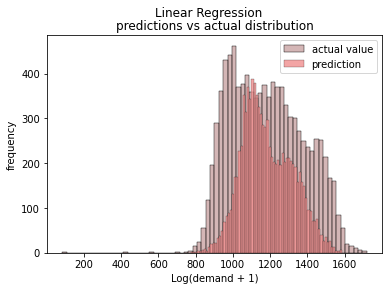

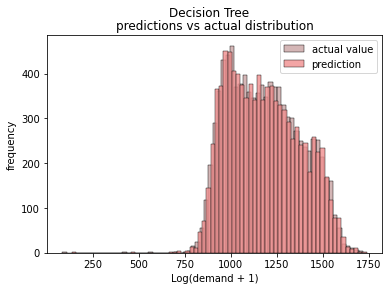

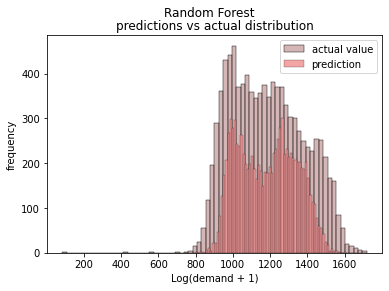

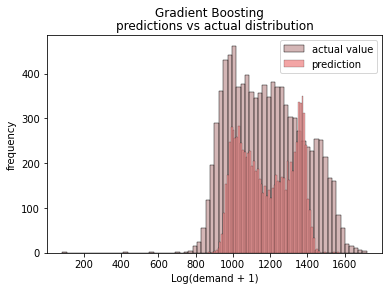

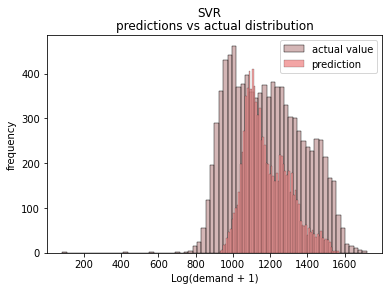

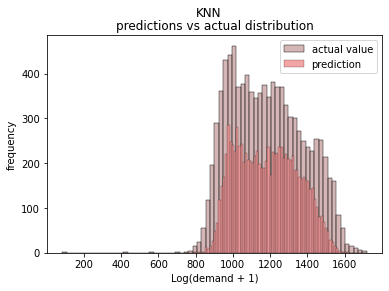

In [35]:
for key, value in predictions.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(y_test, label='actual value', color='#ab6f6f', alpha=0.5, bins=70)
    sns.histplot(value, label='prediction', color='#f08f8f', alpha=0.8, bins=70)

    plt.legend()

    plt.ylabel('frequency')
    plt.xlabel('Log(demand + 1)')
    plt.title('predictions vs actual distribution')
    plt.suptitle(key)
    plt.show()

### Applying regularisation

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [37]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Elastic Net Regression", ElasticNet())
]

predictions = {}
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(
            f'Model: {name}... ',
            f'Root Mean Squared Error: {rmse}... ',
            f'R-squared score: {r2}'
    )

Model: Linear Regression...  Root Mean Squared Error: 18924.921943124933...  R-squared score: 0.49400093858240157
Model: Lasso Regression...  Root Mean Squared Error: 19664.059392610972...  R-squared score: 0.47423848688920434
Model: Elastic Net Regression...  Root Mean Squared Error: 20432.764387787054...  R-squared score: 0.45368548237827055


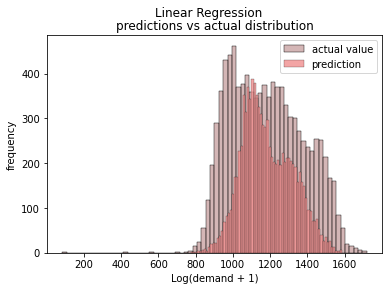

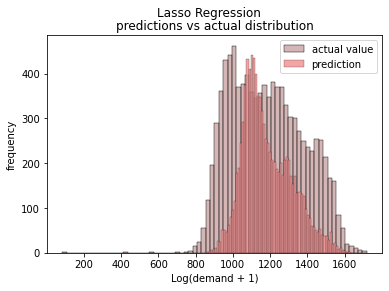

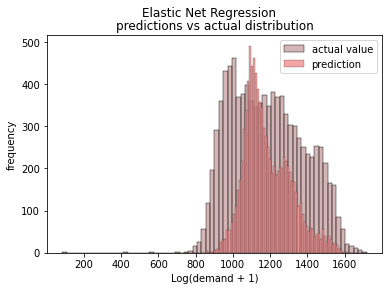

In [38]:
for key, value in predictions.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(y_test, label='actual value', color='#ab6f6f', alpha=0.5, bins=70)
    sns.histplot(value, label='prediction', color='#f08f8f', alpha=0.8, bins=70)

    plt.legend()

    plt.ylabel('frequency')
    plt.xlabel('Log(demand + 1)')
    plt.title('predictions vs actual distribution')
    plt.suptitle(key)
    plt.show()

### Saving Best Model

In [49]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(
        f'Model: Random Forest... ',
        f'Root Mean Squared Error: {rmse}... ',
        f'R-squared score: {r2}'
)

Model: Random Forest...  Root Mean Squared Error: 11147.924054829846...  R-squared score: 0.7019359379419907


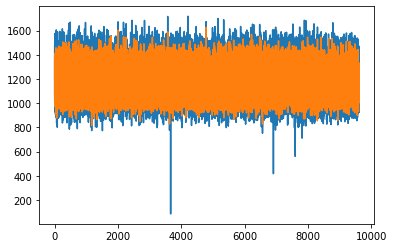

In [60]:
plt.plot(np.array(y_test))
plt.plot(y_pred)

In [51]:
import pickle

In [52]:
# Save the best model to a .pkl file
model_filename = 'best_model.pkl'

with open(model_filename, 'wb') as f_out:
    pickle.dump(model, f_out)

### Feature Importance

In [68]:
columns = [
 't2m_toc',
 'qv2m_toc',
 'tql_toc',
 'w2m_toc',
 't2m_san',
 'qv2m_san',
 'tql_san',
 'w2m_san',
 't2m_dav',
 'qv2m_dav',
 'tql_dav',
 'w2m_dav',
 'holiday_id',
 'holiday',
 'school']

In [69]:
continuous_data[columns].corrwith(continuous_data.nat_demand)

t2m_toc       0.652811
qv2m_toc     -0.036706
tql_toc       0.073109
w2m_toc       0.098435
t2m_san       0.627024
qv2m_san      0.022172
tql_san       0.119038
w2m_san       0.191796
t2m_dav       0.648279
qv2m_dav     -0.002117
tql_dav       0.042037
w2m_dav      -0.054802
holiday_id   -0.129834
holiday      -0.165673
school        0.040044
dtype: float64